<a href="https://colab.research.google.com/github/plmiller8607/23-Project_4-Predicting_Student_Success/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Student Performance**
Contents:
1.   Load and Clean Data
2.   Analyze the Data
3.  Train Model



# 1. Load and Clean Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Load the CSV file into a DataFrame
df = pd.read_csv('student_data_redact.csv')

# Display the first few rows of the DataFrame
df.head(100)

Saving student_data_redact.csv to student_data_redact.csv


,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,Female,Hispanic,Hispanic,9,4801000,French 1,A,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,Male,Hispanic,Hispanic,9,5321000,Algebra 1,A,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,Male,Hispanic,Hispanic,9,4201350,English 1 IB Prep,C,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,Male,Hispanic,Hispanic,9,5711000,Biology 1,F,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,Male,Hispanic,Hispanic,9,4823000,Spanish 3,A,2C,L06-Trailside Point,12,2018,2018,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,316787,Male,Hispanic,Hispanic,11,4205000,English 5,D,English,L08-Paseo Pointe,3,2021,2020,Q3
96,300797,Female,Hispanic,Hispanic,11,5341000,Algebra 3,NM,Mathematics,L06-Trailside Point,3,2021,2020,Q3
97,395184,Female,Hispanic,Hispanic,9,6098000,Career & Technology Exploration 1,A,4A,Z99-Out of Dist Elem,12,2018,2018,S1
98,341274,Male,Hispanic,Hispanic,11,4206000,English 6,D,English,L05-Desert Meadows,5,2021,2020,Q4


In [ ]:
# Rename the dataframe
student_data_df=df
# Print the first 20 lines of student_data
student_data_df.head(20)

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,Female,Hispanic,Hispanic,9,4801000,French 1,A,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,Male,Hispanic,Hispanic,9,5321000,Algebra 1,A,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,Male,Hispanic,Hispanic,9,4201350,English 1 IB Prep,C,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,Male,Hispanic,Hispanic,9,5711000,Biology 1,F,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,Male,Hispanic,Hispanic,9,4823000,Spanish 3,A,2C,L06-Trailside Point,12,2018,2018,S1
5,250382,Male,Hispanic,Hispanic,9,5341350,Algebra 3 IB Prep,B,2E,L06-Trailside Point,12,2018,2018,S1
6,323484,Female,Hispanic,Hispanic,9,4801000,French 1,A,2C,L06-Trailside Point,12,2018,2018,S1
7,323348,Male,Non-Hispanic,White,9,9414000,Advisory 1,P,GE,L05-Desert Meadows,12,2018,2018,S1
8,323355,Female,Hispanic,Hispanic,9,4201000,English 1,F,3C,L05-Desert Meadows,12,2018,2018,S1
9,372690,Male,Hispanic,Hispanic,9,5321350,Algebra 1 IB Prep,F,2E,L01-Laveen Elem,12,2018,2018,S1


In [ ]:
student_data_df.dtypes

,0
student_id,int64
gender,object
hispanic_latino,object
ethnicity,object
grade,int64
course_id,object
course_title,object
mark,object
department,object
elementary_school_code,object


In [ ]:
# drop missing data
cleaned_student_data_df = student_data_df.dropna().copy()

In [ ]:
# Round the values to ensure they are integers
cleaned_student_data_df['student_id'] = cleaned_student_data_df['student_id'].round(0).astype('int64')
cleaned_student_data_df['grade'] = cleaned_student_data_df['grade'].round(0).astype('int64')
cleaned_student_data_df['calendar_month'] = cleaned_student_data_df['calendar_month'].round(0).astype('int64')
cleaned_student_data_df['calendar_year'] = cleaned_student_data_df['calendar_year'].round(0).astype('int64')
cleaned_student_data_df['school_year'] = cleaned_student_data_df['school_year'].round(0).astype('int64')

# Verify the conversion
print(cleaned_student_data_df.dtypes)


student_id                 int64
gender                    object
hispanic_latino           object
ethnicity                 object
grade                      int64
course_id                 object
course_title              object
mark                      object
department                object
elementary_school_code    object
calendar_month             int64
calendar_year              int64
school_year                int64
term_code                 object
dtype: object


In [ ]:
cleaned_student_data_df

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,Female,Hispanic,Hispanic,9,4801000,French 1,A,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,Male,Hispanic,Hispanic,9,5321000,Algebra 1,A,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,Male,Hispanic,Hispanic,9,4201350,English 1 IB Prep,C,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,Male,Hispanic,Hispanic,9,5711000,Biology 1,F,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,Male,Hispanic,Hispanic,9,4823000,Spanish 3,A,2C,L06-Trailside Point,12,2018,2018,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22647,295715,Female,Non-Hispanic,Black or African American,12,5841000,Economics 1,C,2H,Z99-Out of Dist Elem,5,2019,2018,S2
22648,295715,Female,Non-Hispanic,Black or African American,12,2220050,Career Exploration -VL 1 (10-12 Only),B,VL,Z99-Out of Dist Elem,5,2019,2018,S2
22649,295715,Female,Non-Hispanic,Black or African American,12,2220030,Strategies for Academic Success - VL,C,VL,Z99-Out of Dist Elem,5,2019,2018,S2
22650,295715,Female,Non-Hispanic,Black or African American,12,5531000,Health Education 1,C,51,Z99-Out of Dist Elem,5,2019,2018,S2


In [ ]:
# Encode Gender with Male = 1 and Female = 2
cleaned_student_data_df.loc[:, 'gender'] = cleaned_student_data_df['gender'].map({'Male': 1, 'Female': 2})

cleaned_student_data_df

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,2,Hispanic,Hispanic,9,4801000,French 1,A,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,1,Hispanic,Hispanic,9,5321000,Algebra 1,A,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,1,Hispanic,Hispanic,9,4201350,English 1 IB Prep,C,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,1,Hispanic,Hispanic,9,5711000,Biology 1,F,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,1,Hispanic,Hispanic,9,4823000,Spanish 3,A,2C,L06-Trailside Point,12,2018,2018,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22647,295715,2,Non-Hispanic,Black or African American,12,5841000,Economics 1,C,2H,Z99-Out of Dist Elem,5,2019,2018,S2
22648,295715,2,Non-Hispanic,Black or African American,12,2220050,Career Exploration -VL 1 (10-12 Only),B,VL,Z99-Out of Dist Elem,5,2019,2018,S2
22649,295715,2,Non-Hispanic,Black or African American,12,2220030,Strategies for Academic Success - VL,C,VL,Z99-Out of Dist Elem,5,2019,2018,S2
22650,295715,2,Non-Hispanic,Black or African American,12,5531000,Health Education 1,C,51,Z99-Out of Dist Elem,5,2019,2018,S2


In [ ]:
# Check for invalid genders
invalid_genders = cleaned_student_data_df[~cleaned_student_data_df['gender'].isin([1, 2])]

if not invalid_genders.empty:
  print(invalid_genders['gender'])
else:
  print("No invalid gender present")

No invalid gender present


In [ ]:
# Encode hispanic_latino with Male = 1 and Female = 2
cleaned_student_data_df.loc[:, 'hispanic_latino'] = cleaned_student_data_df['hispanic_latino'].map({'Hispanic': 1, 'Non-Hispanic': 2})

cleaned_student_data_df.head(25)

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,2,1,Hispanic,9,4801000,French 1,A,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,1,1,Hispanic,9,5321000,Algebra 1,A,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,1,1,Hispanic,9,4201350,English 1 IB Prep,C,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,1,1,Hispanic,9,5711000,Biology 1,F,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,1,1,Hispanic,9,4823000,Spanish 3,A,2C,L06-Trailside Point,12,2018,2018,S1
5,250382,1,1,Hispanic,9,5341350,Algebra 3 IB Prep,B,2E,L06-Trailside Point,12,2018,2018,S1
6,323484,2,1,Hispanic,9,4801000,French 1,A,2C,L06-Trailside Point,12,2018,2018,S1
7,323348,1,2,White,9,9414000,Advisory 1,P,GE,L05-Desert Meadows,12,2018,2018,S1
8,323355,2,1,Hispanic,9,4201000,English 1,F,3C,L05-Desert Meadows,12,2018,2018,S1
9,372690,1,1,Hispanic,9,5321350,Algebra 1 IB Prep,F,2E,L01-Laveen Elem,12,2018,2018,S1


In [ ]:
# Check for invalid hispanic_latino
invalid_hispanic_latino = cleaned_student_data_df[~cleaned_student_data_df['hispanic_latino'].isin([1, 2])]

if not invalid_hispanic_latino.empty:
  print(invalid_hispanic_latino['hispanic_latino???'])
else:
  print("No invalid hispanic_latino present")

No invalid hispanic_latino present


In [ ]:
# Print the unique variables in column "ethnicity"

print(cleaned_student_data_df['ethnicity'].unique())

['Hispanic' 'White' 'Asian' 'Two or More' 'Black or African American'
 'American Indian or Alaskan Native'
 'Native Hawaiian or other Pacific Islander'
 'American Indian - Alaska Native' 'Black - African American'
 'Native Hawaiian - Pacific islander']


In [ ]:
#Clean data entry variations in the 'ethnicity' column

# Replace 'Black - African American' with 'Black or African American'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('Black - African American', 'Black or African American')

# Replace 'American Indian - Alaska Native' with 'American Indian or Alaskan Native'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('American Indian - Alaska Native', 'American Indian or Alaskan Native')

# Replace 'Native Hawaiian - Pacific islander' with 'Native Hawaiian or other Pacific islander'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('Native Hawaiian - Pacific islander', 'Native Hawaiian or other Pacific islander')

# Replace 'American Indian - Alaskan Native' with 'American Indian or Alaskan Native'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('American Indian - Alaskan Native', 'American Indian or Alaskan Native')



# Verify the changes
print(cleaned_student_data_df['ethnicity'].unique())

['Hispanic' 'White' 'Asian' 'Two or More' 'Black or African American'
 'American Indian or Alaskan Native'
 'Native Hawaiian or other Pacific Islander'
 'Native Hawaiian or other Pacific islander']


In [ ]:
# Replace 'American Indian or Alaska Native' with 'American Indian or Alaskan Native'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('American Indian or Alaska Native', 'American Indian or Alaskan Native')

# Replace 'Native Hawaiian or other Pacific Islander' with 'Native Hawaiian or Pacific islander'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('Native Hawaiian or other Pacific islander', 'Native Hawaiian or Pacific Islander')

# Verify the changes
print(cleaned_student_data_df['ethnicity'].unique())

['Hispanic' 'White' 'Asian' 'Two or More' 'Black or African American'
 'American Indian or Alaskan Native'
 'Native Hawaiian or other Pacific Islander'
 'Native Hawaiian or Pacific Islander']


In [ ]:
# Replace 'Native Hawaiian or Pacific islander' with 'Native Hawaiian or Pacific Islander'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('Native Hawaiian or other Pacific Islander', 'Native Hawaiian or Pacific Islander')

# Verify the changes
print(cleaned_student_data_df['ethnicity'].unique())

In [ ]:
# Replace 'Native Hawaiian or Pacific islander' with 'Native Hawaiian or Pacific Islander'
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].replace('Native Hawaiian or Pacific islander', 'Native Hawaiian or Pacific Islander')

# Verify the changes
print(cleaned_student_data_df['ethnicity'].unique())

In [ ]:
# Encode 'ethnicity' column

# Create mapping
ethnicity_mapping = {
    'Black or African American': 3,
    'Hispanic': 4,
    'Asian': 2,
    'White': 7,
    'American Indian or Alaskan Native': 1,
    'Two or More Races': 6,
    'Native Hawaiian or Pacific Islander': 5
}

# Encode the 'ethnicity' column using the mapping
cleaned_student_data_df['ethnicity'] = cleaned_student_data_df['ethnicity'].map(ethnicity_mapping)

# Display the updated DataFrame
cleaned_student_data_df.head(25)

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,2,1,4.0,9,4801000,French 1,A,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,1,1,4.0,9,5321000,Algebra 1,A,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,1,1,4.0,9,4201350,English 1 IB Prep,C,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,1,1,4.0,9,5711000,Biology 1,F,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,1,1,4.0,9,4823000,Spanish 3,A,2C,L06-Trailside Point,12,2018,2018,S1
5,250382,1,1,4.0,9,5341350,Algebra 3 IB Prep,B,2E,L06-Trailside Point,12,2018,2018,S1
6,323484,2,1,4.0,9,4801000,French 1,A,2C,L06-Trailside Point,12,2018,2018,S1
7,323348,1,2,7.0,9,9414000,Advisory 1,P,GE,L05-Desert Meadows,12,2018,2018,S1
8,323355,2,1,4.0,9,4201000,English 1,F,3C,L05-Desert Meadows,12,2018,2018,S1
9,372690,1,1,4.0,9,5321350,Algebra 1 IB Prep,F,2E,L01-Laveen Elem,12,2018,2018,S1


In [ ]:
# Check for invalid ethnicity values
invalid_ethnicity = cleaned_student_data_df[~cleaned_student_data_df['ethnicity'].isin([1, 2, 3, 4, 5, 6, 7])]

if not invalid_ethnicity.empty:
    # Print the rows with invalid ethnicity values
    print(invalid_ethnicity[['ethnicity']])
else:
    print("No invalid ethnicity present")


       ethnicity
74           NaN
219          NaN
220          NaN
221          NaN
222          NaN
...          ...
22554        NaN
22555        NaN
22556        NaN
22557        NaN
22558        NaN

[698 rows x 1 columns]


In [ ]:
# Drop rows with NaN values in the 'ethnicity' column
cleaned_student_data_df = cleaned_student_data_df.dropna(subset=['ethnicity'])

# Verify the changes
print(cleaned_student_data_df['ethnicity'].unique())

[4. 7. 2. 3. 1. 5.]


In [ ]:
cleaned_student_data_df

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,2,1,4.0,9,4801000,French 1,A,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,1,1,4.0,9,5321000,Algebra 1,A,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,1,1,4.0,9,4201350,English 1 IB Prep,C,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,1,1,4.0,9,5711000,Biology 1,F,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,1,1,4.0,9,4823000,Spanish 3,A,2C,L06-Trailside Point,12,2018,2018,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22647,295715,2,2,3.0,12,5841000,Economics 1,C,2H,Z99-Out of Dist Elem,5,2019,2018,S2
22648,295715,2,2,3.0,12,2220050,Career Exploration -VL 1 (10-12 Only),B,VL,Z99-Out of Dist Elem,5,2019,2018,S2
22649,295715,2,2,3.0,12,2220030,Strategies for Academic Success - VL,C,VL,Z99-Out of Dist Elem,5,2019,2018,S2
22650,295715,2,2,3.0,12,5531000,Health Education 1,C,51,Z99-Out of Dist Elem,5,2019,2018,S2


In [ ]:
# Print unique variables in column "Mark"

print(cleaned_student_data_df['mark'].unique())

['A' 'C' 'F' 'B' 'P' 'D' 'NM' 'NP' 'INC' 'AU']


In [ ]:

# Drop rows with 'NP', 'INC', 'AU', 'NM' in the 'mark' column
values_to_drop = ['NP', 'INC', 'AU', 'NM','P']
cleaned_student_data_df = cleaned_student_data_df[~cleaned_student_data_df['mark'].isin(values_to_drop)]

# Verify the changes
print(cleaned_student_data_df['mark'].unique())

['A' 'C' 'F' 'B' 'D']


In [ ]:
# Encode 'mark' column

# Create mapping
mark_mapping = {
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'F': 1
   }

# Encode the 'mark' column using the mapping
cleaned_student_data_df['mark'] = cleaned_student_data_df['mark'].map(mark_mapping)

print(cleaned_student_data_df['mark'].unique())

[5 3 1 4 2]


<ipython-input-21-0408b424ffd8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_student_data_df['mark'] = cleaned_student_data_df['mark'].map(mark_mapping)


In [ ]:
cleaned_student_data_df.head()

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code
0,300373,2,1,4.0,9,4801000,French 1,5,2C,L04-Cheatham Elem,12,2018,2018,S1
1,369229,1,1,4.0,9,5321000,Algebra 1,5,2E,L01-Laveen Elem,12,2018,2018,S1
2,250382,1,1,4.0,9,4201350,English 1 IB Prep,3,3C,L06-Trailside Point,12,2018,2018,S1
3,389698,1,1,4.0,9,5711000,Biology 1,1,2G,L06-Trailside Point,12,2018,2018,S1
4,250382,1,1,4.0,9,4823000,Spanish 3,5,2C,L06-Trailside Point,12,2018,2018,S1


In [ ]:
# Check for missing values
print(cleaned_student_data_df.isnull().sum())


student_id                0
gender                    0
hispanic_latino           0
ethnicity                 0
grade                     0
course_id                 0
course_title              0
mark                      0
department                0
elementary_school_code    0
calendar_month            0
calendar_year             0
school_year               0
term_code                 0
dtype: int64


In [ ]:
# Print unique values in department
cleaned_student_data_df['department'].unique()

array(['2C', '2E', '3C', '2G', '51', '2H', '2B', '15', '3H', 'GE',
       'English', 'Visual Arts', 'Mathematics', 'Science',
       'World Language', '4A', '2F', '60', 'ME', '55', '3E', 'SE',
       'CTE Business Education', 'Social Studies', 'Reading',
       'Physical Education / Health', 'General Electives',
       'Performing Arts', 'English Electives', 'English ELL', 'JROTC',
       'CTE Health Careers', 'Non-Academic', 'Mathematics Elective',
       'CTE Industrial Tech Ed', 'ESP - All Exceptions',
       'CTE Family & Cons Science', 'Social Studies Elective',
       'Virtual Learning', 'General Vocational Elective',
       'Student Opportunities', '4D', 'SO', '4G', 'VL'], dtype=object)

In [ ]:

# Drop rows with unneccesary departments
values_to_drop = ['2C', '2E', '3C', '2G', '51', '2H', '2B', '15', '3H', 'GE',
                  '4A', '2F', '60', 'ME', '55', '3E', 'SE','4D', 'SO', '4G', 'VL']
cleaned_student_data_df = cleaned_student_data_df[~cleaned_student_data_df['department'].isin(values_to_drop)]

# Verify the changes
print(cleaned_student_data_df['department'].unique())

['English' 'Visual Arts' 'Mathematics' 'Science' 'World Language'
 'CTE Business Education' 'Social Studies' 'Reading'
 'Physical Education / Health' 'General Electives' 'Performing Arts'
 'English Electives' 'English ELL' 'JROTC' 'CTE Health Careers'
 'Non-Academic' 'Mathematics Elective' 'CTE Industrial Tech Ed'
 'ESP - All Exceptions' 'CTE Family & Cons Science'
 'Social Studies Elective' 'Virtual Learning'
 'General Vocational Elective' 'Student Opportunities']


In [ ]:

# Drop rows with unneccesary departments
values_to_drop = ['ESP - All Exceptions', 'Non-Academic']
cleaned_student_data_df = cleaned_student_data_df[~cleaned_student_data_df['department'].isin(values_to_drop)]

# Verify the changes
print(cleaned_student_data_df['department'].unique())

['English' 'Visual Arts' 'Mathematics' 'Science' 'World Language'
 'CTE Business Education' 'Social Studies' 'Reading'
 'Physical Education / Health' 'General Electives' 'Performing Arts'
 'English Electives' 'English ELL' 'JROTC' 'CTE Health Careers'
 'Mathematics Elective' 'CTE Industrial Tech Ed'
 'CTE Family & Cons Science' 'Social Studies Elective' 'Virtual Learning'
 'General Vocational Elective' 'Student Opportunities']


In [ ]:

# Drop rows with unneccesary departments
values_to_drop = ['General Vocational Elective', 'English Electives','Social Studies Elective','Student Opportunities']
cleaned_student_data_df = cleaned_student_data_df[~cleaned_student_data_df['department'].isin(values_to_drop)]

# Verify the changes
print(cleaned_student_data_df['department'].unique())

['English' 'Visual Arts' 'Mathematics' 'Science' 'World Language'
 'CTE Business Education' 'Social Studies' 'Reading'
 'Physical Education / Health' 'General Electives' 'Performing Arts'
 'English ELL' 'JROTC' 'CTE Health Careers' 'Mathematics Elective'
 'CTE Industrial Tech Ed' 'CTE Family & Cons Science' 'Virtual Learning']


In [ ]:
# Count the number of unique departments
department_count = len(cleaned_student_data_df['department'].unique())

print(f"Number of departments: {department_count}")

Number of departments: 18


In [ ]:
# Print unique values in elementary_school_code
cleaned_student_data_df['elementary_school_code'].unique()

array(['L06-Trailside Point', 'L08-Paseo Pointe', 'L04-Cheatham Elem',
       'L01-Laveen Elem', 'L02-M C Cash Elem', 'L07-Rogers Ranch School',
       'L03-Vista Del Sur', 'L05-Desert Meadows', 'Z99-Out of Dist Elem',
       'R22-Ed Pastor Elem', 'Z98-Charter Sch Unspecified',
       'R23-C Campbell Elem', 'R10-Sunland Elem', 'R21-Southwest Elem',
       'V02-Kings Ridge Elem', 'M06-Meadows Elem',
       'T24-Raul Castro Middle Sch', 'R26-Bernard Black Academy',
       'R12-Valley View Elem', 'A23-James W. Rice',
       'T09-Desert Sands Jr High Sch', 'I08-Pueblo Del Sol',
       'R20-Bush Elem', 'R03-Julian Elem', 'R16-Amy Houston Academy',
       'R01-Jorgensen Elem', 'P09-Herrera/Lincoln Elem',
       'P02-Bethune Elem', 'T10-Frank Borman Jr High Sch',
       'T20-Marc Atkinson Middle Sch', 'B06-Tillman Middle School',
       'Y03-Sullivan Elem', 'I03-Isaac Jr High Sch', 'R17-Davis Elem',
       'A18-Carol G Peck Elem', 'T12-Estrella Jr High Sch',
       'A21-Andalucia Middle Schoo

In [ ]:
# prompt: truncate each elementary_school_code entry to just the first 3 characters

cleaned_student_data_df['elementary_school_code'] = cleaned_student_data_df['elementary_school_code'].astype(str).str[:3]

In [ ]:
# Print unique values in elementary_school_code
cleaned_student_data_df['elementary_school_code'].unique()

array(['L06', 'L08', 'L04', 'L01', 'L02', 'L07', 'L03', 'L05', 'Z99',
       'R22', 'Z98', 'R23', 'R10', 'R21', 'V02', 'M06', 'T24', 'R26',
       'R12', 'A23', 'T09', 'I08', 'R20', 'R03', 'R16', 'R01', 'P09',
       'P02', 'T10', 'T20', 'B06', 'Y03', 'I03', 'R17', 'A18', 'T12',
       'A21', 'C03', 'I10', 'V01', 'B02', 'N07', 'P05', 'P27', 'R18',
       'A02', 'P11', 'A19', 'A14', 'A22', 'P04'], dtype=object)

# 2. Analyze the Data

In [ ]:


# Define unique ethnicities
ethnicities = cleaned_student_data_df['ethnicity'].unique()

# Initialize list to hold average marks
average_marks_by_ethnicity = []

# Loop through each ethnicity and calculate average marks
for ethnicity in ethnicities:
    average_mark = cleaned_student_data_df[cleaned_student_data_df['ethnicity'] == ethnicity]['mark'].mean()
    rounded_average_mark = round(average_mark, 2)
    average_marks_by_ethnicity.append((ethnicity, rounded_average_mark))

# Print the results
print("Average mark by ethnicity:")
for ethnicity, average_mark in average_marks_by_ethnicity:
    print(f"Ethnicity {ethnicity}: {average_mark}")


Average mark by ethnicity:
Ethnicity 2.0: 4.3
Ethnicity 7.0: 3.88
Ethnicity 4.0: 3.41
Ethnicity 1.0: 2.62
Ethnicity 3.0: 3.33
Ethnicity 5.0: 2.94


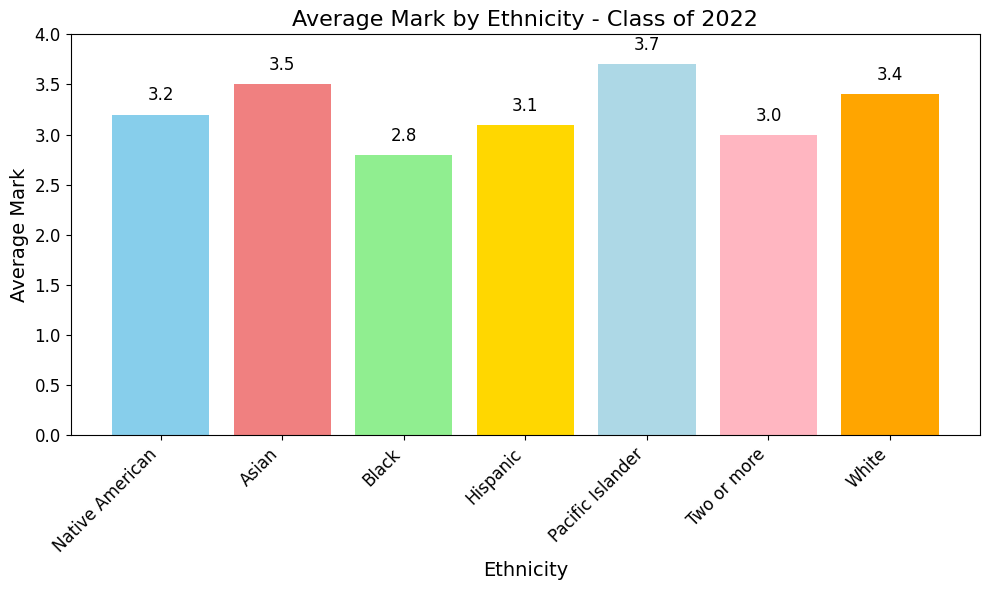

In [ ]:


# Create histogram
ethnicity_data = {
    1: 3.2,
    2: 3.5,
    3: 2.8,
    4: 3.1,
    5: 3.7,
    6: 3.0,
    7: 3.4
}


ethnicity_labels = {
    1: 'Native American',
    2: 'Asian',
    3: 'Black',
    4: 'Hispanic',
    5: 'Pacific Islander',
    6: 'Two or more',
    7: 'White'
}

colors = {
    1: 'skyblue',
    2: 'lightcoral',
    3: 'lightgreen',
    4: 'gold',
    5: 'lightblue',
    6: 'lightpink',
    7: 'orange'
}

ethnicities = list(ethnicity_data.keys())
average_marks = list(ethnicity_data.values())
labels = [ethnicity_labels[e] for e in ethnicities]


plt.figure(figsize=(10, 6))
bars = plt.bar(labels, average_marks, color=[colors[e] for e in ethnicities])
plt.title("Average Mark by Ethnicity - Class of 2022", fontsize=16)
plt.xlabel("Ethnicity", fontsize=14)
plt.ylabel("Average Mark", fontsize=14)
plt.ylim(0, 4.0)

for bar, avg_mark, ethnicity in zip(bars, average_marks, ethnicities):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(avg_mark), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

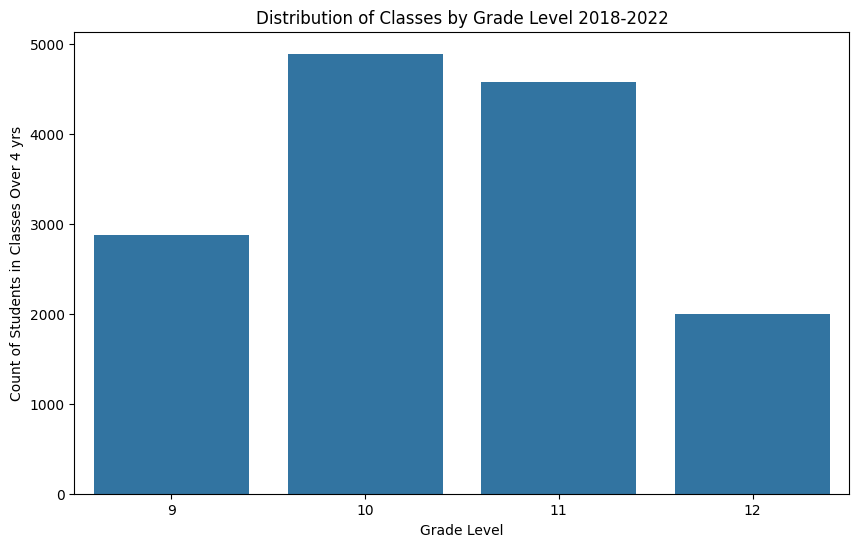

In [ ]:
# Distribution of classes Grade Level
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', data=cleaned_student_data_df)
plt.title('Distribution of Classes by Grade Level 2018-2022')
plt.xlabel('Grade Level')
plt.ylabel('Count of Students in Classes Over 4 yrs')

plt.show()

In [ ]:
# Display frequency of each elementary_school_code from highest to lowest
elementary_school_counts_df = cleaned_student_data_df['elementary_school_code'].value_counts()
elementary_school_counts_df

,count
elementary_school_code,
Z99,3610
L06,1679
L05,1669
L07,1636
L04,927
L08,925
L01,786
L02,729
L03,687


In [ ]:
# Create new column for elementary_school_code called elementary_school that includes the counts
elementary_school_counts_df = elementary_school_counts_df.reset_index()
elementary_school_counts_df.columns = ['elementary_school_code', 'elementary_school_counts']
elementary_school_counts_df['elementary_school'] = elementary_school_counts_df['elementary_school_code'] + '-' + elementary_school_counts_df['elementary_school_counts'].astype(str)
elementary_school_counts_df

,elementary_school_code,elementary_school_counts,elementary_school
0,Z99,3610,Z99-3610
1,L06,1679,L06-1679
2,L05,1669,L05-1669
3,L07,1636,L07-1636
4,L04,927,L04-927
5,L08,925,L08-925
6,L01,786,L01-786
7,L02,729,L02-729
8,L03,687,L03-687
9,V02,377,V02-377


In [ ]:
elementary_school_counts_df

,elementary_school_code,elementary_school_counts,elementary_school
0,Z99,3610,Z99-3610
1,L06,1679,L06-1679
2,L05,1669,L05-1669
3,L07,1636,L07-1636
4,L04,927,L04-927
5,L08,925,L08-925
6,L01,786,L01-786
7,L02,729,L02-729
8,L03,687,L03-687
9,V02,377,V02-377


In [ ]:

# Merge to add the 'elementary_school' column
cleaned_student_data_df = pd.merge(
    cleaned_student_data_df,
    elementary_school_counts_df[['elementary_school_code', 'elementary_school']],
    on='elementary_school_code',
    how='left'
)




In [ ]:
# Display the first few rows of the updated DataFrame
cleaned_student_data_df.head()

,student_id,gender,hispanic_latino,ethnicity,grade,course_id,course_title,mark,department,elementary_school_code,calendar_month,calendar_year,school_year,term_code,elementary_school
0,469225,1,2,2.0,9,4202600,English 2 Honors,5,English,L06,5,2022,2021,S2,L06-1679
1,439868,2,2,7.0,9,500660,Explorations in Art 2,5,Visual Arts,L08,5,2022,2021,S2,L08-925
2,488753,1,1,4.0,9,5322000,Algebra 2,2,Mathematics,L04,5,2022,2021,S2,L04-927
3,442667,2,1,4.0,9,4202000,English 2,5,English,L01,5,2022,2021,S2,L01-786
4,373301,2,1,4.0,9,4202000,English 2,1,English,L04,5,2022,2021,S2,L04-927


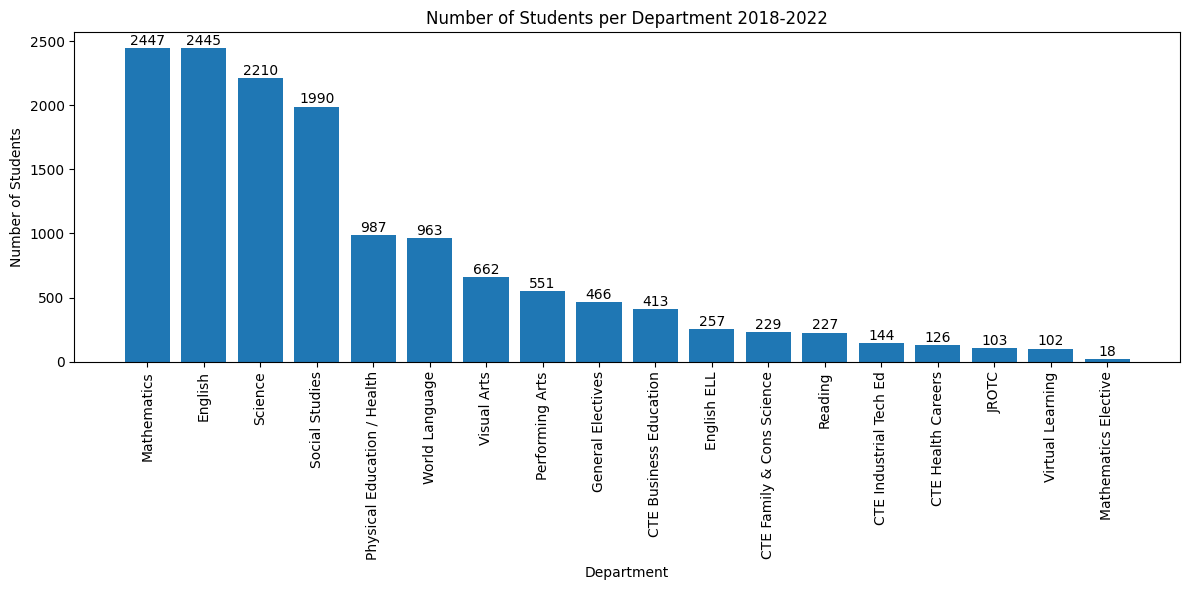

In [ ]:

# Create a histogram to calculate the number of students in each department
department_counts = cleaned_student_data_df['department'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(department_counts.index, department_counts.values)

# Add labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.xlabel("Department")
plt.ylabel("Number of Students")
plt.title("Number of Students per Department 2018-2022")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

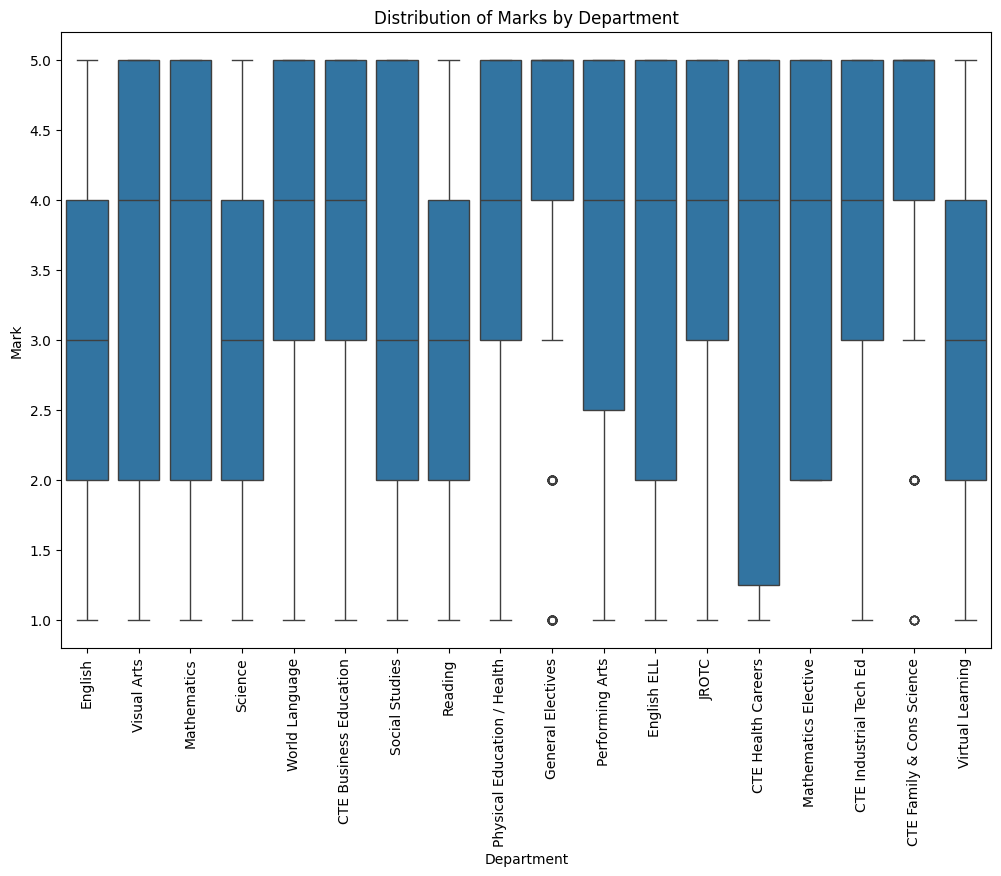

In [ ]:
# Distribution of marks by department
plt.figure(figsize=(12, 8))
sns.boxplot(x='department', y='mark', data=cleaned_student_data_df)
plt.title('Distribution of Marks by Department')
plt.xlabel('Department')
plt.ylabel('Mark')
plt.xticks(rotation=90)
plt.show()

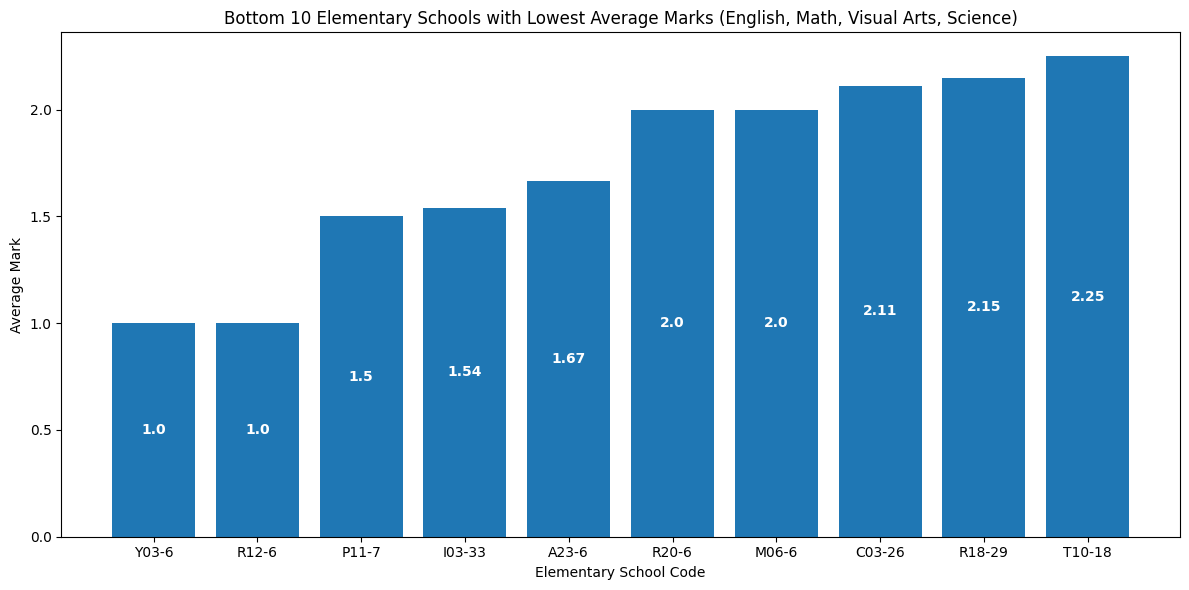

In [ ]:
# Create a bar graph showing the bottom 10 elementary_school with the lowest average grades
#in English, Mathematics,Social Studies, and Science

# Filter for specified departments
departments = ['English', 'Mathematics', 'Social Studies', 'Science']
filtered_df = cleaned_student_data_df[cleaned_student_data_df['department'].isin(departments)]

# Group by elementary school code and calculate the average mark
average_marks = filtered_df.groupby('elementary_school')['mark'].mean().reset_index()

# Sort by average mark in ascending order and get the bottom 10
bottom_10_schools = average_marks.sort_values(by='mark', ascending=True).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_10_schools['elementary_school'], bottom_10_schools['mark'])

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 2), ha='center', va='center', color='white', fontweight='bold')

plt.xlabel("Elementary School Code")
plt.ylabel("Average Mark")
plt.title("Bottom 10 Elementary Schools with Lowest Average Marks (English, Math, Visual Arts, Science)")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

<ipython-input-48-2209c0b463ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mark'] = pd.to_numeric(filtered_df['mark'], errors='coerce')


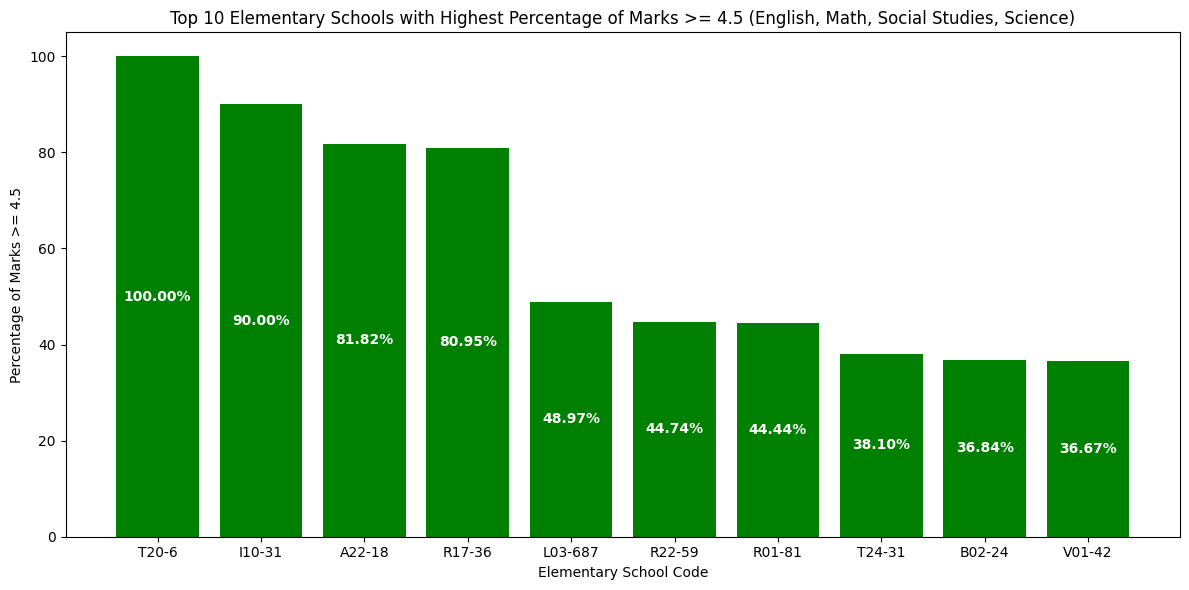

In [ ]:
# Create bar graph for Top 10 Elementary Schools with Highest Percentage of Marks >= 4.5 English, Math, Social Studies, Science
# Ensure the 'mark' column is numeric
filtered_df['mark'] = pd.to_numeric(filtered_df['mark'], errors='coerce')

# Calculate the percentage of marks >= 4.5
def calculate_percentage_above_threshold(series, threshold=4.5):
    return (series >= threshold).mean() * 100

# Group by elementary school code and calculate the percentage of marks >= 4.5
percentage_above_4_5 = (
    filtered_df.groupby('elementary_school')['mark']
    .apply(calculate_percentage_above_threshold)
    .reset_index()
    .rename(columns={'mark': 'percentage_above_4_5'})
)

# Sort by percentage_above_4_5 in descending order and get the top 10
top_10_schools = percentage_above_4_5.sort_values(by='percentage_above_4_5', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_schools['elementary_school'], top_10_schools['percentage_above_4_5'], color='green')

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f"{yval:.2f}%", ha='center', va='center', color='white', fontweight='bold')

plt.xlabel("Elementary School Code")
plt.ylabel("Percentage of Marks >= 4.5")
plt.title("Top 10 Elementary Schools with Highest Percentage of Marks >= 4.5 (English, Math, Social Studies, Science)")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


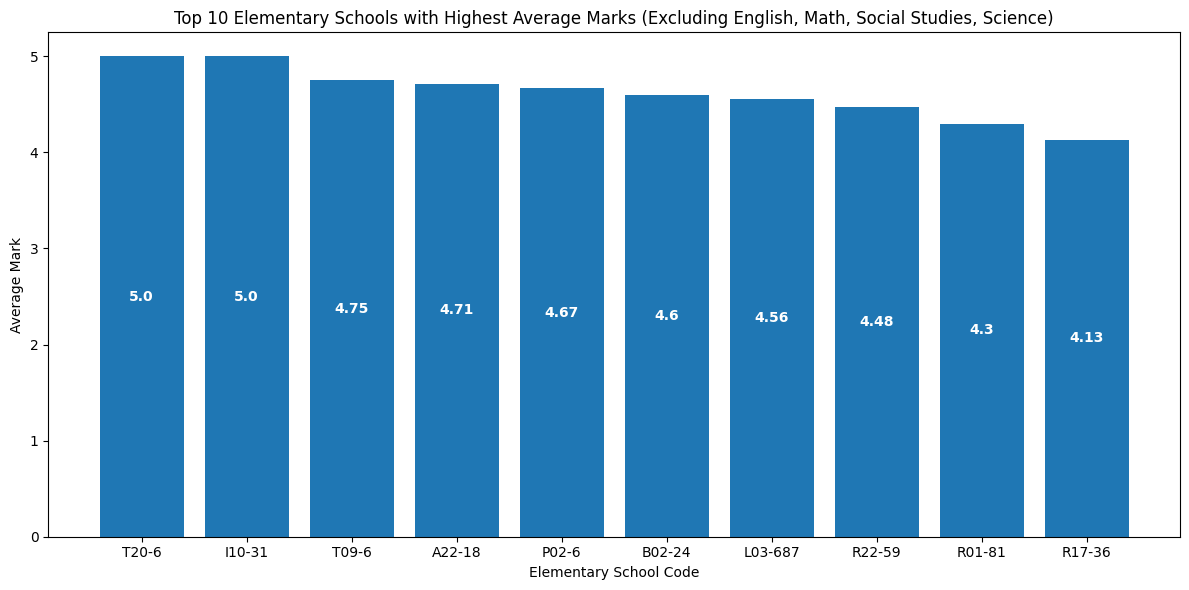

In [ ]:
# Filter out specified departments
departments_to_exclude = ['English', 'Mathematics', 'Social Studies', 'Science']
filtered_df = cleaned_student_data_df[~cleaned_student_data_df['department'].isin(departments_to_exclude)]

# Group by elementary school and calculate the average mark
average_marks = filtered_df.groupby('elementary_school')['mark'].mean().reset_index()

# Sort by average mark in descending order and get the top 10
top_10_schools = average_marks.sort_values(by='mark', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_schools['elementary_school'], top_10_schools['mark'])

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 2), ha='center', va='center', color='white', fontweight='bold')

plt.xlabel("Elementary School Code")
plt.ylabel("Average Mark")
plt.title("Top 10 Elementary Schools with Highest Average Marks (Excluding English, Math, Social Studies, Science)")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

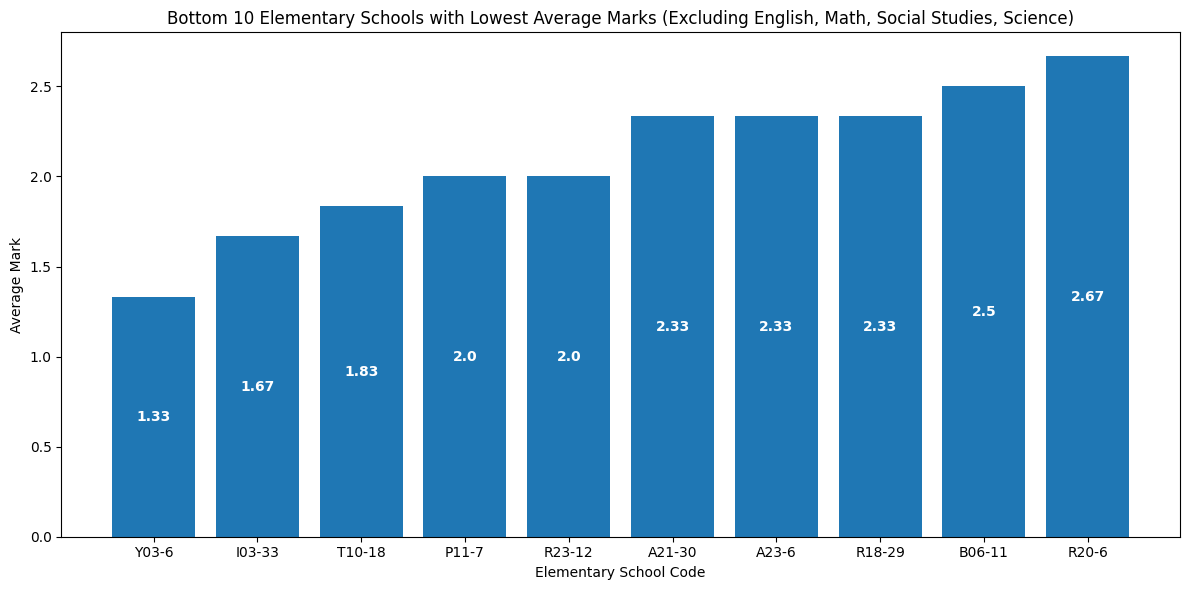

In [ ]:
# Filter out specified departments
departments_to_exclude = ['English', 'Mathematics', 'Social Studies', 'Science']
filtered_df = cleaned_student_data_df[~cleaned_student_data_df['department'].isin(departments_to_exclude)]

# Group by elementary school and calculate the average mark
average_marks = filtered_df.groupby('elementary_school')['mark'].mean().reset_index()

# Sort by average mark in ascending order and get the bottom 10
bottom_10_schools = average_marks.sort_values(by='mark', ascending=True).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_10_schools['elementary_school'], bottom_10_schools['mark'])

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 2), ha='center', va='center', color='white', fontweight='bold')

plt.xlabel("Elementary School Code")
plt.ylabel("Average Mark")
plt.title("Bottom 10 Elementary Schools with Lowest Average Marks (Excluding English, Math, Social Studies, Science)")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

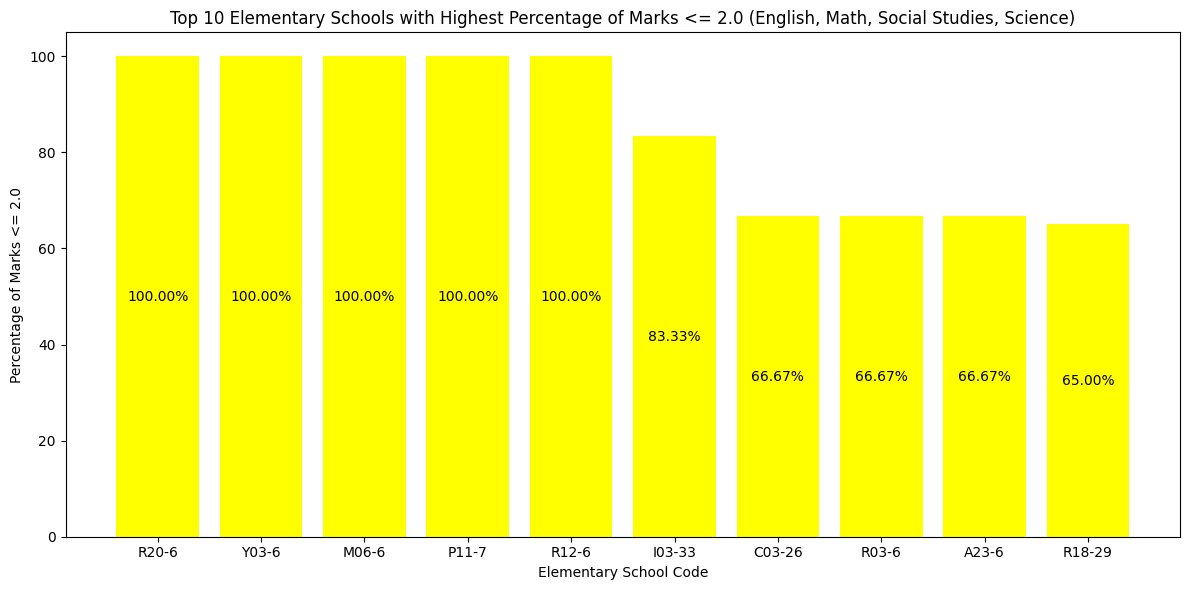

In [ ]:
#Top 10 elementary schools with highest percentage of marks <=2.0 (English, Math, Social Studies, Science)
# Filter for specified departments
departments = ['English', 'Mathematics', 'Social Studies', 'Science']
filtered_df = cleaned_student_data_df[cleaned_student_data_df['department'].isin(departments)].copy()

# Ensure the 'mark' column is numeric using .loc to avoid the SettingWithCopyWarning
filtered_df.loc[:, 'mark'] = pd.to_numeric(filtered_df['mark'], errors='coerce')

# Calculate the percentage of marks <= 2.0
def calculate_percentage_below_threshold(series, threshold=2.0):
    return (series <= threshold).mean() * 100

# Group by elementary school code and calculate the percentage of marks <= 2.0
percentage_below_2_0 = (
    filtered_df.groupby('elementary_school')['mark']
    .apply(calculate_percentage_below_threshold)
    .reset_index()
    .rename(columns={'mark': 'percentage_below_2_0'})
)

# Sort by percentage_below_2_0 in descending order and get the top 10
top_10_schools = percentage_below_2_0.sort_values(by='percentage_below_2_0', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_schools['elementary_school'], top_10_schools['percentage_below_2_0'], color='yellow')

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f"{yval:.2f}%", ha='center', va='center', color='black')

plt.xlabel("Elementary School Code")
plt.ylabel("Percentage of Marks <= 2.0")
plt.title("Top 10 Elementary Schools with Highest Percentage of Marks <= 2.0 (English, Math, Social Studies, Science)")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


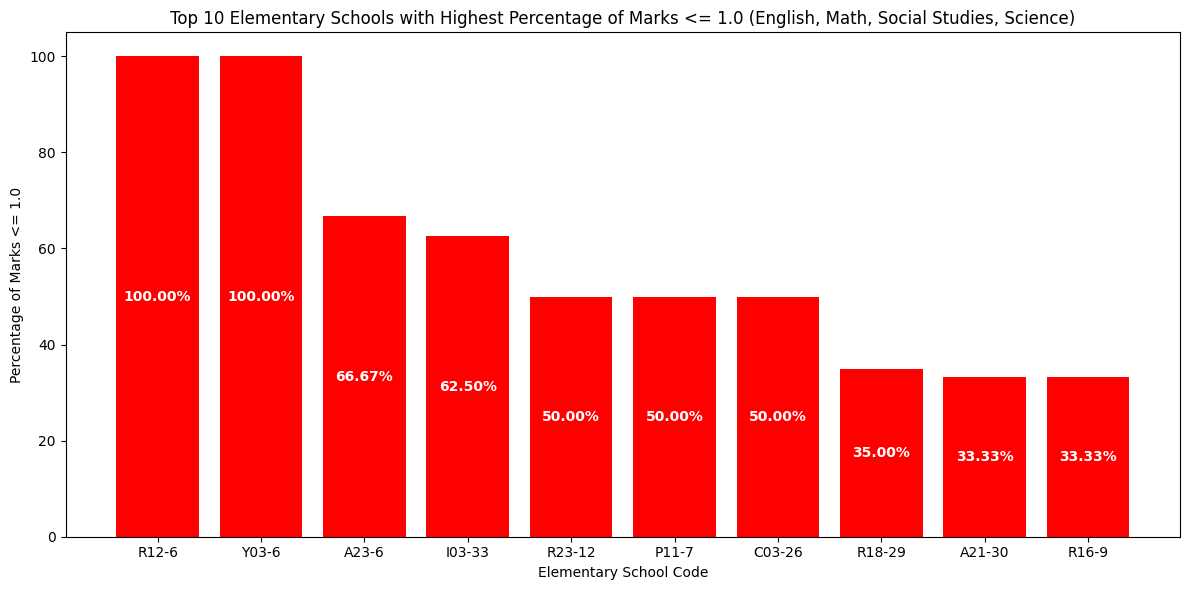

In [ ]:


# Calculate the percentage of marks <= 1.0
def calculate_percentage_below_threshold(series, threshold=1.0):
    return (series <= threshold).mean() * 100

# Group by elementary school code and calculate the percentage of marks <= 1.0
percentage_below_1_0 = (
    filtered_df.groupby('elementary_school')['mark']
    .apply(calculate_percentage_below_threshold)
    .reset_index()
    .rename(columns={'mark': 'percentage_below_1_0'})
)

# Sort by percentage_below_1_0 in descending order and get the top 10
top_10_schools = percentage_below_1_0.sort_values(by='percentage_below_1_0', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_schools['elementary_school'], top_10_schools['percentage_below_1_0'], color='red')

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f"{yval:.2f}%", ha='center', va='center', color='white', fontweight='bold')

plt.xlabel("Elementary School Code")
plt.ylabel("Percentage of Marks <= 1.0")
plt.title("Top 10 Elementary Schools with Highest Percentage of Marks <= 1.0 (English, Math, Social Studies, Science)")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


# 3. Training Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




In [ ]:

# Filter for specified departments
departments = ['English', 'Mathematics', 'Social Studies', 'Science']
filtered_df = cleaned_student_data_df[cleaned_student_data_df['department'].isin(departments)].copy()

# Convert marks to numeric
filtered_df['mark'] = pd.to_numeric(filtered_df['mark'], errors='coerce')

# Define the target variable (e.g., pass/fail based on mark)
filtered_df['target'] = np.where(filtered_df['mark'] >= 3, 1, 0)


# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
filtered_df['department'] = le.fit_transform(filtered_df['department'])
filtered_df['elementary_school_code'] = le.fit_transform(filtered_df['elementary_school_code'])

# Convert marks to numeric
filtered_df['mark'] = pd.to_numeric(filtered_df['mark'], errors='coerce')

# Define the target variable (e.g., pass/fail based on mark)
filtered_df['target'] = np.where(filtered_df['mark'] >= 3, 1, 0)


In [ ]:
# Define feature columns and target column
features = ['department', 'grade', 'elementary_school_code']
X = filtered_df[features]
y = filtered_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.44      0.10      0.16       887
           1       0.68      0.94      0.79      1841

    accuracy                           0.67      2728
   macro avg       0.56      0.52      0.48      2728
weighted avg       0.60      0.67      0.59      2728



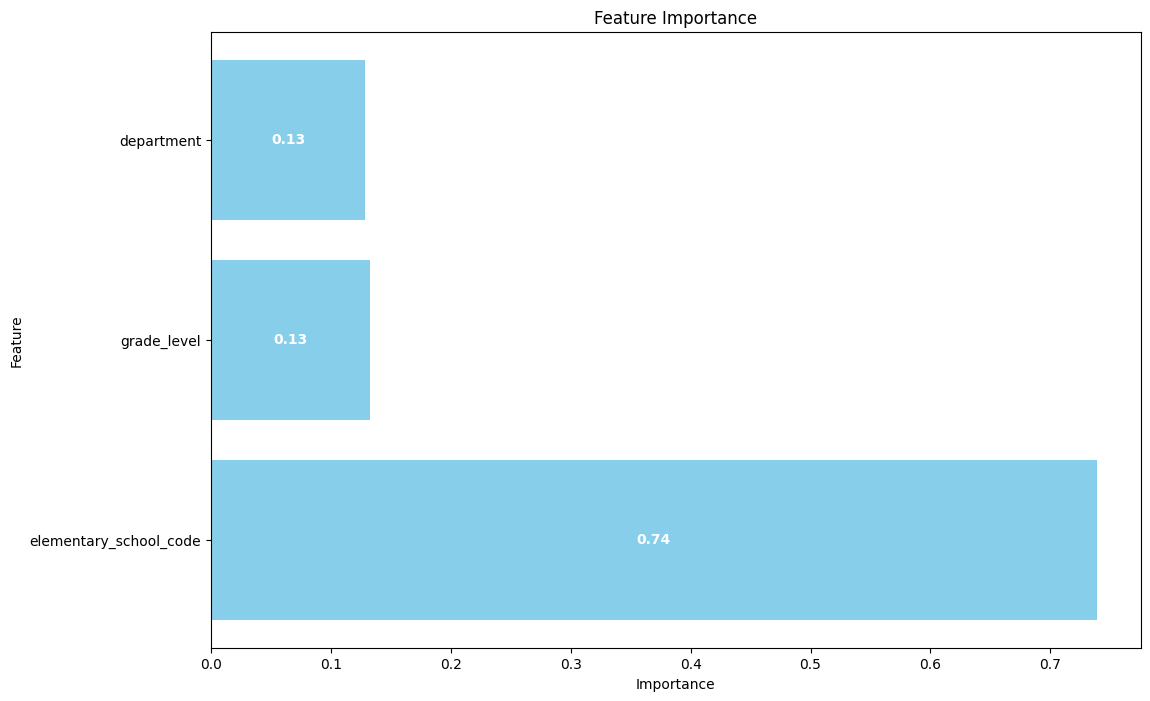

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Feature importance
plt.figure(figsize=(12, 8))

# Create a pandas Series for feature importances
feature_importances = pd.Series(model.feature_importances_, index=features)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Rename 'grade' to 'grade_level'
feature_importances.index = feature_importances.index.str.replace('grade', 'grade_level')

# Plot the feature importances as a horizontal bar chart
bars = plt.barh(feature_importances.index, feature_importances, color='skyblue')

# Add labels inside each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval/2, bar.get_y() + bar.get_height()/2, f"{xval:.2f}", ha='center', va='center', color='white', fontweight='bold')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [ ]:
# Re-ran model with Random Forest "trees" changed from 100 to 200

In [ ]:
# Define feature columns and target column
features = ['department', 'grade', 'elementary_school_code']
X = filtered_df[features]
y = filtered_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.43      0.10      0.16       887
           1       0.68      0.94      0.79      1841

    accuracy                           0.66      2728
   macro avg       0.56      0.52      0.48      2728
weighted avg       0.60      0.66      0.59      2728



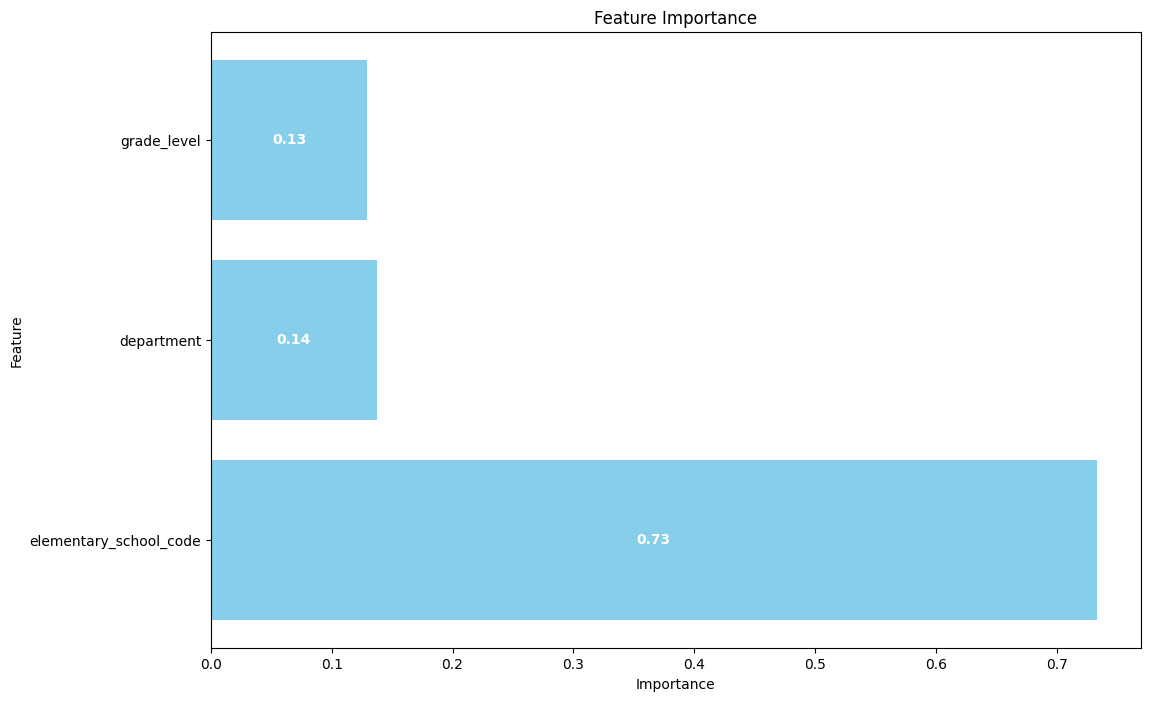

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Feature importance
plt.figure(figsize=(12, 8))

# Create a pandas Series for feature importances
feature_importances = pd.Series(model.feature_importances_, index=features)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Rename 'grade' to 'grade_level'
feature_importances.index = feature_importances.index.str.replace('grade', 'grade_level')

# Plot the feature importances as a horizontal bar chart
bars = plt.barh(feature_importances.index, feature_importances, color='skyblue')

# Add labels inside each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval/2, bar.get_y() + bar.get_height()/2, f"{xval:.2f}", ha='center', va='center', color='white', fontweight='bold')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [ ]:
#Re-ran model with expanded features

In [ ]:
# Define feature columns and target column
features = ['gender','hispanic_latino','ethnicity','department', 'grade', 'elementary_school_code','school_year']
X = filtered_df[features]
y = filtered_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.52      0.29      0.37       887
           1       0.72      0.87      0.79      1841

    accuracy                           0.68      2728
   macro avg       0.62      0.58      0.58      2728
weighted avg       0.65      0.68      0.65      2728



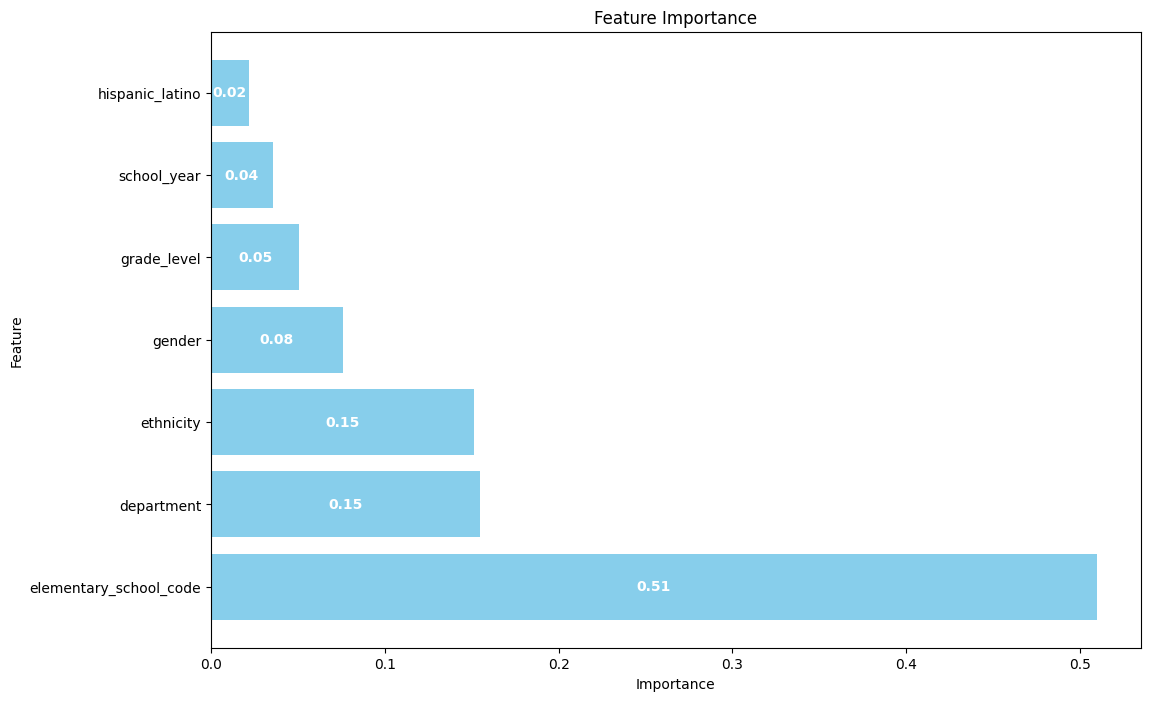

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Feature importance
plt.figure(figsize=(12, 8))

# Create a pandas Series for feature importances
feature_importances = pd.Series(model.feature_importances_, index=features)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Rename 'grade' to 'grade_level'
feature_importances.index = feature_importances.index.str.replace('grade', 'grade_level')

# Plot the feature importances as a horizontal bar chart
bars = plt.barh(feature_importances.index, feature_importances, color='skyblue')

# Add labels inside each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval/2, bar.get_y() + bar.get_height()/2, f"{xval:.2f}", ha='center', va='center', color='white', fontweight='bold')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
